# Introductie

In dit notebook kijk ik enerzijds naar historische emissies van broeikasgassen (BKG) sinds 1990 in Nederland, en anderzijds naar het voorgenomen beleid zoals beschreven in de Klimaatwet, en vergelijk in hoeverre dit overeenkomt met datgene afgesproken in het [Akkoord van Parijs](https://nl.wikipedia.org/wiki/Akkoord_van_Parijs). 

Het begrip **koolstofbudget** is hierbij van belang. Het wereldwijde koolstofbudget is ruwweg de bovengrens aan cumulatieve toekomstige BKG-emissies die nog compatibel zijn met een bepaalde temperatuursdoelstelling. Het is geëigend om het koolstofbudget te gebruiken vanwege een bijna lineaire relatie tussen temperatuur en cumulatieve emissies (zie [Figuur 1b - Relatie temperatuurstijging en cumulatieve CO2-emissie](https://esb-external-prod.imgix.net/02bCMOIq6trNtBqF8rk02g-AEiI.png?cs=tinysrgb&w=1280); bron: PBL.) Dit betekent overigens ***geenzins*** dat de gevolgen van de temperatuursstijging lineair is! De toegenomen risico's van 1 naar 2 graad opwarming (+1º) zijn zeer zeker kleiner dan die van 2 naar 3 graad opwarming (+1º): de gevolgen zijn daarmee non-lineair. Aan het begrip koolstofbudget kleven een [aantal complicerende aspecten](https://www.carbonbrief.org/analysis-how-much-carbon-budget-is-left-to-limit-global-warming-to-1-5c), zoals de mogelijkheid van net-negatieve emissies, die we hier voor de eenvoud zullen negeren. 

Bij het berekenen van een nationaal koolstofbudget (zoals dat van Nederland) is het begrip **equity** van belang, ofwel rechtvaardigheid. In het Akkoord van Parijs wordt hier veelvuldig over gesproken, bijvoorbeeld in [Artikel 2.2](https://en.wikisource.org/wiki/Paris_Agreement#Article_2): 
>This Agreement will be implemented to reflect equity and the principle of common but differentiated responsibilities and respective capabilities, in the light of different national circumstances.

of in [Artikel 4.1](https://en.wikisource.org/wiki/Paris_Agreement#Article_4): 
> In order to achieve the long-term temperature goal set out in Article 2, Parties aim to reach global peaking of greenhouse gas emissions as soon as possible, recognizing that peaking will take longer for developing country Parties, and to undertake rapid reductions thereafter in accordance with best available science, so as to achieve a balance between anthropogenic emissions by sources and removals by sinks of greenhouse gases in the second half of this century, on the basis of equity, and in the context of sustainable development and efforts to eradicate poverty. 

Vrij vertaald naar het Nederlands: 'de sterkste schouders zullen de zwaarste lasten dragen'. Deze formulering is dermate vaag dat er veel ruimte voor interpretatie overblijft. Het rekenen met nationale koolstofbudget is daarom geen exacte wetenschap, omdat keuzes in 'wat is eerlijk' de uitkomst in hoge mate bepalen. Hierover later meer. 

In dit notebook baseer ik mij op het (op dit moment meest recente) IPCC rapport uit 2018 waar mondiale koolstofbudgetten worden berekend - het [Special Report on Global Warming of 1.5 ºC](https://www.ipcc.ch/sr15/). Meegenomen worden de totale hoeveelheid emissies, dus niet alleen CO2 maar ook methaan, F-gassen etc. aangezien deze ook bijdragen aan het broeikaseffect. Elke BKG-bron wordt uitgedrukt in CO2-equivalent (afgekort tot CO2-eq.) om het inzichtelijk en vergelijkbaar te maken. De gebruikte informatiebron voor historische emissies in Nederland zijn de BKG-tabellen van de [Emissieregistratie](http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx), tevens te vinden bij het [Compendium voor de Leefomgeving](https://www.clo.nl/indicatoren/nl0165-broeikasgasemissies-in-nederland?ond=20883). 


Leo van Kampenhout<br>
september/oktober 2020

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Deel 1 - Historische emissies in Nederland, en voorgenomen beleid

Emissiedata gedownload van <br>
https://www.clo.nl/indicatoren/nl0165-broeikasgasemissies-in-nederland?ond=20883 <br>
op 29 september 2020

In [23]:
df = pd.read_excel('c-0165-001g-clo-37-nl.xlsx',sheet_name='Emissie broeikasgassen',skiprows=5,index_col=0)

"""
2018 is het laatste jaar met *definitieve* data
""" 
df = df[df.index < 2019]
df.index = df.index.astype(int)
df.tail()

,Mton CO2-equivalenten,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
2014,159.197,18.008292,8.558245,1.850063,NaN,NaN,NaN
2015,166.818,18.202621,8.808214,2.044882,NaN,NaN,NaN
2016,166.733,18.329046,8.476745,1.903725,NaN,NaN,NaN
2017,164.898,18.012193,8.657644,1.761858,NaN,NaN,NaN
2018,160.611,17.308777,8.349118,1.928345,NaN,NaN,NaN


De eerste vier kolommen bevatten de data die we nodig hebben (CO2, CH4, N2O, F-gassen). Hieronder tellen we ze op en plotten het resultaat. 

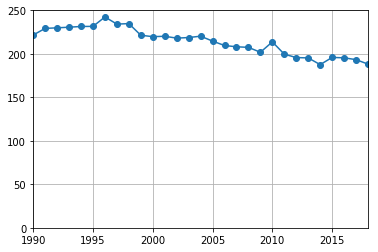

In [24]:
df_emis_NL = df[df.columns[0:4]].sum(axis=1) 
df_emis_NL.plot(marker='o')
plt.ylim((0,250))
plt.grid()

Individuele waardes kunnen vergeleken worden met de website van [Emissieregistratie](http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx), om te checken dat we hetzelfde berekend hebben. 

In [25]:
df_emis_NL[2018]

188.19678902343048

### Reductie 2018

In [26]:
print('reductie in 2018 t.o.v. 1990')
print('{:.2f} %'.format((1.0 - df_emis_NL[2018] / df_emis_NL[1990])*100))

reductie in 2018 t.o.v. 1990
15.10 %


Ter referentie, het 4e kabinet Balkenende uit 2007 had als doelstelling in het regeerakkoord had opgenomen om de totale emissies in 2020 gereduceerd te hebben met 30% t.o.v. 1990 (bron: [NRC](https://outline.com/8MyPLN)). Deze doelstelling is door latere kabinetten losgelaten. Het Urgenda-vonnis eist alsnog 25% reductie door de staat (bron: [Rijksoverheid](https://www.rijksoverheid.nl/actueel/nieuws/2020/04/24/kabinet-neemt-maatregelen-voor-extra-co2-reductie)). 

### Voorgenomen beleid (klimaatwet)
In de klimaatwet is vastgelegd dat emissies in 2030 met 49% worden gereduceerd, en in 2050 met 95%

Bron: https://www.energienieuws.info/2019/05/klimaatwet-aangenomen.html

Met een lineaire daling ziet dat er zo uit: 

In [27]:
# AANNAME 1: het 2020 doel van Urgenda wordt gehaald
emis_NL_2020 = 0.75 * df_emis_NL[1990]
emis_NL_2030 = 0.51 * df_emis_NL[1990]
emis_NL_2050 = 0.05 * df_emis_NL[1990]

In [28]:
emis_NL_2020, emis_NL_2030, emis_NL_2050

(166.24354399106141, 113.04560991392177, 11.082902932737428)

In [29]:
def emissies_2020s(jaar):
    daling_per_jaar = (emis_NL_2020 - emis_NL_2030) / 10
    return emis_NL_2020 - daling_per_jaar * (jaar-2020)

assert(np.isclose(emissies_2020s(2020), emis_NL_2020))
assert(np.isclose(emissies_2020s(2030), emis_NL_2030))

In [30]:
def emissies_2030s_2040s(jaar):
    daling_per_jaar = (emis_NL_2030 - emis_NL_2050) / 20
    return emis_NL_2030 - daling_per_jaar * (jaar-2030)

assert(np.isclose(emissies_2030s_2040s(2030), emis_NL_2030))
assert(np.isclose(emissies_2030s_2040s(2050), emis_NL_2050))

In [31]:
years1 = np.arange(2020, 2031)
emissies1 = list(map(emissies_2020s, years1))

years2 = np.arange(2031, 2051)
emissies2 = list(map(emissies_2030s_2040s, years2))

Voorlopige waarde voor 2019 : 183,9 <br>
Bron: `http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx` <br>geraadpleegd op 29 sept 2020. 

In [32]:
df_emis_NL[2019] = 183.9

In [166]:
c_dict = {}
c_dict['hist'] = 'powderblue' # historical bar chart
c_dict['future'] = 'peachpuff' # future bar chart
c_dict['future2'] = 'sandybrown' # future bar chart
c_dict['edge'] = '#dddddd' # edge

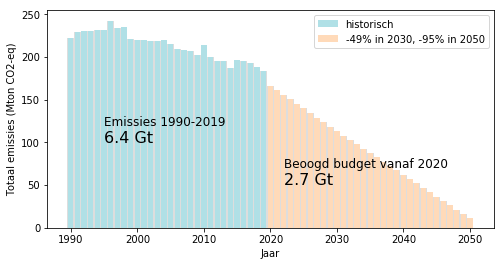

In [57]:
plt.figure(figsize=(8,4))
#lw=2

def plot_bar(x, y, color, label=None):
    # Helper function to add grey shading on background
    plt.bar(x, y, width=1, color=c_dict['edge'])
    plt.bar(x, y, label=label, color=color)

plot_bar(df_emis_NL.index, df_emis_NL, color=c_dict['hist'], label='historisch')
    
    
plot_bar(years1, emissies1, label='-49% in 2030, -95% in 2050', color=c_dict['future'])
plot_bar(years2, emissies2,  color = c_dict['future'])

#plt.bar(years1, emissies1,  label='-49% in 2030, -95% in 2050', color=c_dict['future'])
#plt.bar(years2, emissies2,  color = c_dict['future'])

plt.xlabel('Jaar')
plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.legend()

hist_sum = df_emis_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = (np.sum(emissies1) + np.sum(emissies2)) / 1e3
plt.text(2022,70,s=f'Beoogd budget vanaf 2020',fontdict={'fontsize':12})
plt.text(2022,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})

plt.savefig('figuur1_huidig.png',dpi=300)

We tellen nu de emissies in alle jaren (2020-2050) bij elkaar op om tot een totaal te komen

In [35]:
np.sum(emissies1)  + np.sum(emissies2)

2726.394121453407

# Deel 2 - Het nationale koolstofbudget van Nederland

Berekeningen geïnspireerd door Stefan Rahmstorf, in zijn blogpost [Wie viel CO2 kann Deutschland noch ausstoßen?](https://scilogs.spektrum.de/klimalounge/wie-viel-co2-kann-deutschland-noch-ausstossen/) op SciLogs. 

Eerst wat algemene variabelen uitrekenen.

In [36]:
inwoners_NL = 17.4e6 # 1-1-2019, https://en.wikipedia.org/wiki/Netherlands
inwoners_wereld = 7.8e9 # maart 2020, https://en.wikipedia.org/wiki/World_population

inwoners_NL_frac_wereld = inwoners_NL / inwoners_wereld 

print('Bevolking NL als percentage wereldbevolking: {:.2f} %'.format(inwoners_NL_frac_wereld*100))

Bevolking NL als percentage wereldbevolking: 0.22 %


Het Urgenda-vonnis stelt: 25% reductie in 2020 t.o.v. 1990

In [37]:
emis_Urgenda = df_emis_NL[1990] * 0.75 # 
print(f'Emissies NL in 2020: {emis_Urgenda:.1f} Mton')

Emissies NL in 2020: 166.2 Mton


## Berekening 1: Parijs 1,75 graad (66% kans)

*Dit is een interpretatie van de doelstelling "ruim onder 2 graden" uit het Klimaatakkoord van Parijs.*

**Aannames**
* Mondiale koolstofbudget uit: IPCC SR15, tabel 2.2. 
* Het koolstofbudget voor Nederland is evenredig met haar bevolking
* Het koolstofbudget wordt "uitgedeeld" per 1.1.2016, kort na het Akkoord van van Parijs
* Het Urgenda-vonnis wordt gehaald, waarmee de emissies in 2020 uitkomen op 166,2 Mton

Deze aannames zijn (deels) een interpretatie van het begrip **equity** uit het Akkoord van Parijs, ofwel 'de sterkste schouders dragen de zwaarste lasten'. Zoals reeds beschreven in de Introductie, de keuzes hierin zullen de uitkomst sterk beïnvloeden. Een 'uitdelen' van het koolstofbudget op een eerder op later moment bijvoorbeeld. 

In [179]:
budget_2018 = 800 * 1e9/1e6 # Gt naar Mton, begin 2018
correctie_2016 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar

budget_2016 = budget_2018 + correctie_2016

print(f'Koolstofbudget wereld per 1.1.2016: {budget_2016:.0f} Mton')

Koolstofbudget wereld per 1.1.2016: 880000 Mton


In [115]:
budget_NL_2016 = inwoners_NL_frac_wereld * budget_2016
print(f'Koolstofbudget NL per 1.1.2016: {budget_NL_2016:.0f} Mton')

Koolstofbudget NL per 1.1.2016: 1963 Mton


Sinds het peiljaar 2016 zijn we 4 jaren verder met weinig mitigatie. Het budget per 1.1.2020 is geslonken tot

In [116]:
budget_NL_2020 = budget_NL_2016 - df_emis_NL[[2016,2017,2018,2019]].sum()
print(f'Koolstofbudget NL per 1.1.2020: {budget_NL_2020:.0f} Mton')

Koolstofbudget NL per 1.1.2020: 1202 Mton


Met huidige emissies (2020 / Urgenda) na hoeveel jaren is het budget op? 

In [117]:
budget_NL_2020 / emis_Urgenda

7.231608860003495

Gegeven het budget, dit is de tijd die we hebben om de emissies lineair naar nul te brengen. Het aantal is INCLUSIEF het startjaar, te weten 2020

In [118]:
jaren_tot_nul = np.int((budget_NL_2020 * 2 ) / emis_Urgenda)
jaren_tot_nul

14

Beetje Pandas magic om de lineaire reductie om te zetten in een emissie-waarde per jaar: 

In [119]:
df = pd.Series(index=np.arange(2020,2020+jaren_tot_nul))
df[2020] = emis_Urgenda
df[df.index[-1]] = 0
df_1p75_lin = df.interpolate()
df_1p75_lin

2020    166.243544
2021    153.455579
2022    140.667614
2023    127.879649
2024    115.091684
2025    102.303719
2026     89.515754
2027     76.727790
2028     63.939825
2029     51.151860
2030     38.363895
2031     25.575930
2032     12.787965
2033      0.000000
dtype: float64

In [120]:
print(f'Lineaire emissiedaling naar nul in {df_1p75_lin.index[-1]}: {df_1p75_lin.sum():.0f} Mton')
print(f'Restant door afronding: {budget_NL_2020-df_1p75_lin.sum():.0f} Mton')

Lineaire emissiedaling naar nul in 2033: 1164 Mton
Restant door afronding: 39 Mton


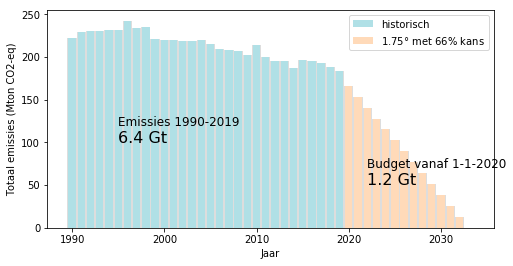

In [136]:
plt.figure(figsize=(8,4))

plot_bar(df_emis_NL.index, df_emis_NL, label='historisch', color=c_dict['hist'])
plot_bar(df_1p75_lin.index, df_1p75_lin, label='1.75$\degree$ met $66\%$ kans', color=c_dict['future'])

plt.xlabel('Jaar')
plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.legend()

hist_sum = df_emis_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = df_1p75_lin.sum() / 1e3
plt.text(2022,70,s=f'Budget vanaf 1-1-2020',fontdict={'fontsize':12})
plt.text(2022,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})

plt.savefig('figuur2_1p75.png',dpi=300)

Jaarlijkse emissie reductie als % van het jaar 2019 en 2020. 

In [122]:
perc = (df_1p75_lin[2020]-df_1p75_lin[2021]) / df_emis_NL[2019] * 100 
print(f'Jaarlijkse emissie reductie: {perc:.1f} % van peiljaar 2019')

perc = (df_1p75_lin[2020]-df_1p75_lin[2021]) / emis_Urgenda * 100 
print(f'Jaarlijkse emissie reductie: {perc:.1f} % van peiljaar 2020')

Jaarlijkse emissie reductie: 7.0 % van peiljaar 2019
Jaarlijkse emissie reductie: 7.7 % van peiljaar 2020


In [189]:
print('Jaar met nul emissies', df_1p75_lin.index[-1])

Jaar met nul emissies 2033


## Berekening 2: Parijs 1,5 graad (66% kans)

*waarbij ook rekening wordt gehouden met terugkoppelingen in het aardsysteem (Earth System Feedbacks). <br>
Dit is de eis van Fridays For Future in hun open brief [Face The Climate Emergency](https://climateemergencyeu.org/).<br>
Onder de mede-ondertekenaars bevinden zich ook vele wetenschappers, waaronder Stefan Rahmstorf en Volker Quaschning van Scientists For Future.*


**Aannames**
* Mondiale koolstofbudget uit: IPCC SR15, tabel 2.2.
* Volgens dezelfde tabel: Earth System Feedbacks: reduce budgets by ~100 Gt
* Het koolstofbudget voor Nederland is evenredig met haar bevolking
* Het koolstofbudget wordt "uitgedeeld" per 1.1.2016, kort na het Akkoord van van Parijs

In [124]:
budget_2018 = 420 * 1e3 # Mton, begin 2018
correctie_feedbacks = -100 * 1e3 # Earth System Feedbacks
correctie_2016 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar

budget_2016 = budget_2018 + correctie_2016 + correctie_feedbacks

print(f'Koolstofbudget wereld per 1.1.2016: {budget_2016:.0f} Mton')

Koolstofbudget wereld per 1.1.2016: 400000 Mton


In [125]:
budget_NL_2016 = inwoners_NL_frac_wereld * budget_2016
print(f'Koolstofbudget NL per 1.1.2016: {budget_NL_2016:.0f} Mton')

Koolstofbudget NL per 1.1.2016: 892 Mton


Sinds het peiljaar 2016 zijn we 4 jaren verder met weinig mitigatie. Het budget per 1.1.2020 is geslonken tot

In [126]:
budget_NL_2020 = budget_NL_2016 - df_emis_NL[[2016,2017,2018,2019]].sum()

#budget_NL_2020 = (budget_2016 - 160e3 ) * inwoners_NL_frac_wereld # Alternatief: taart verdelen vanaf 1.1.2020
print(f'Koolstofbudget NL per 1.1.2020: {budget_NL_2020:.0f} Mton')

Koolstofbudget NL per 1.1.2020: 131 Mton


Met huidige emissies (2020 / Urgenda) na hoeveel jaren is het budget op? 

In [127]:
budget_NL_2020 / emis_Urgenda

0.7906415594820155

Gegeven het budget, dit is de tijd die we hebben om de emissies lineair naar nul te brengen. Het aantal is INCLUSIEF het startjaar, te weten 2020

In [128]:
jaren_tot_nul = np.int((budget_NL_2020 * 2 ) / emis_Urgenda)
jaren_tot_nul

1

Beetje Pandas magic om de lineaire reductie om te zetten in een emissie-waarde per jaar: 

In [129]:
df = pd.Series(index=np.arange(2020,2020+jaren_tot_nul))
df[2020] = emis_Urgenda

df_1p50_lin = df
df_1p50_lin[2020] = min(emis_Urgenda, budget_NL_2020) # Beschikbare budget is kleiner dan Urgenda
#df[df.index[-1]] = 0
#df_1p50_lin = df.interpolate()
df_1p50_lin

2020    131.439055
dtype: float64

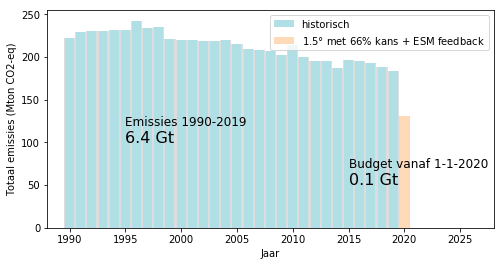

In [134]:
plt.figure(figsize=(8,4))

plot_bar(df_emis_NL.index, df_emis_NL, label='historisch', color=c_dict['hist'])
plot_bar(df_1p50_lin.index, df_1p50_lin, label='1.5$\degree$ met $66\%$ kans + ESM feedback', color=c_dict['future'])

plt.xlabel('Jaar')
plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.legend()

hist_sum = df_emis_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = df_1p50_lin.sum() / 1e3
plt.text(2015,70,s=f'Budget vanaf 1-1-2020',fontdict={'fontsize':12})
plt.text(2015,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})

plt.xlim((1988, 2028))

plt.savefig('figuur3_1p50.png',dpi=300)

## Berekening 3: Parijs 1,5 graad (50% kans)

*een risico-voller scenario dan hierboven, met een kleinere kans en zonder rekening te houden  met terugkoppelingen in het aardsysteem. <br>
Verder is het tijdstip van verdeling verplaatst van 1.1.2016 naar 1.1.2020 wat (veel) gunstiger is voor Nederland (minder gunstig voor ontwikkelingslanden). *


**Aannames**
* Mondiale koolstofbudget uit: IPCC SR15, tabel 2.2.
* Het koolstofbudget voor Nederland is evenredig met haar bevolking
* Het koolstofbudget wordt "uitgedeeld" per 1.1.2020

In [149]:
budget_2018 = 580 * 1e3 # Mton, begin 2018
correctie_2016 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar

budget_2016 = budget_2018 + correctie_2016

print(f'Koolstofbudget wereld per 1.1.2016: {budget_2016:.0f} Mton')

Koolstofbudget wereld per 1.1.2016: 660000 Mton


Taart verdelen per 1.1.2020

In [157]:
budget_NL_2016 = inwoners_NL_frac_wereld * budget_2016
print(f'Koolstofbudget NL per 1.1.2016: {budget_NL_2016:.0f} Mton')

Koolstofbudget NL per 1.1.2016: 1472 Mton


In [158]:
budget_NL_2020 = budget_NL_2016 - df_emis_NL[[2016,2017,2018,2019]].sum()

print(f'Koolstofbudget NL per 1.1.2020: {budget_NL_2020:.0f} Mton')

Koolstofbudget NL per 1.1.2020: 711 Mton


Met huidige emissies (2020 / Urgenda) na hoeveel jaren is het budget op? 

In [159]:
budget_NL_2020 / emis_Urgenda

4.279498847264484

Gegeven het budget, dit is de tijd die we hebben om de emissies lineair naar nul te brengen. Het aantal is INCLUSIEF het startjaar, te weten 2020

In [160]:
jaren_tot_nul = np.int((budget_NL_2020 * 2 ) / emis_Urgenda)
jaren_tot_nul

8

Beetje Pandas magic om de lineaire reductie om te zetten in een emissie-waarde per jaar: 

In [161]:
df = pd.Series(index=np.arange(2020,2020+jaren_tot_nul))
df[2020] = emis_Urgenda

df_1p50_lin = df
df[df.index[-1]] = 0
df_1p50_lin = df.interpolate()
df_1p50_lin

2020    166.243544
2021    142.494466
2022    118.745389
2023     94.996311
2024     71.247233
2025     47.498155
2026     23.749078
2027      0.000000
dtype: float64

In [162]:
print(f'Lineaire emissiedaling naar nul in {df_1p50_lin.index[-1]}: {df_1p50_lin.sum():.0f} Mton')
print(f'Restant door afronding: {budget_NL_2020-df_1p50_lin.sum():.0f} Mton')

Lineaire emissiedaling naar nul in 2027: 665 Mton
Restant door afronding: 46 Mton


In [178]:
def emissies_1p50_verdeling2020(budget_2018):
    """
    ALTERNATIEF: taart verdelen per 1.1.2020
    """
    correctie_2020 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar
    budget_2020 = budget_2018 - correctie_2020 # aftrekken , niet optellen
    budget_NL_2020 = inwoners_NL_frac_wereld * budget_2020
    jaren_tot_nul = np.int((budget_NL_2020 * 2 ) / emis_Urgenda)
    df = pd.Series(index=np.arange(2020,2020+jaren_tot_nul))
    df[2020] = emis_Urgenda
    df_1p50_lin = df
    df[df.index[-1]] = 0
    df_1p50_lin = df.interpolate() 
    print(f'Lineaire emissiedaling naar nul in {df_1p50_lin.index[-1]}: {df_1p50_lin.sum():.0f} Mton')
    print(f'Restant door afronding: {budget_NL_2020-df_1p50_lin.sum():.0f} Mton')
    return df_1p50_lin

In [164]:
df_1p50_lin2 = emissies_1p50_verdeling2020(budget_2018)

Lineaire emissiedaling naar nul in 2032: 1081 Mton
Restant door afronding: 35 Mton


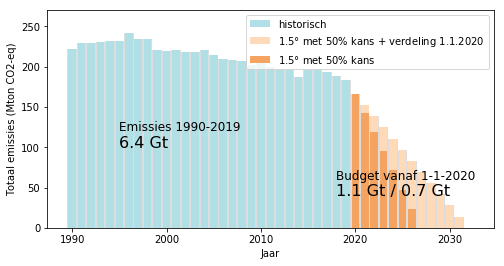

In [187]:
plt.figure(figsize=(8,4))

plot_bar(df_emis_NL.index, df_emis_NL, label='historisch', color=c_dict['hist'])

plot_bar(df_1p50_lin2.index, df_1p50_lin2, label='1.5$\degree$ met $50\%$ kans + verdeling 1.1.2020', color=c_dict['future'])
plot_bar(df_1p50_lin.index, df_1p50_lin, label='1.5$\degree$ met $50\%$ kans', color=c_dict['future2'])

plt.xlabel('Jaar')
plt.ylabel('Totaal emissies (Mton CO2-eq)')


hist_sum = df_emis_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = df_1p50_lin.sum() / 1e3
future_sum2 = df_1p50_lin2.sum() / 1e3
plt.text(2018,60,s=f'Budget vanaf 1-1-2020',fontdict={'fontsize':12})
plt.text(2018,40,s=f'{future_sum2:.1f} Gt / {future_sum:.1f} Gt ',fontdict={'fontsize':16})

plt.ylim((0, 270))
plt.legend()

plt.savefig('figuur4_1p50.png',dpi=300)

In [188]:
print('Jaar met nul emissies', df_1p50_lin2.index[-1], df_1p50_lin.index[-1])

Jaar met nul emissies 2032 2027


In [123]:
perc = (df_1p50_lin[2020]-df_1p50_lin[2021]) / df_emis_NL[2019] * 100 
print(f'Jaarlijkse emissie reductie: {perc:.1f} % van peiljaar 2019')

perc = (df_1p50_lin[2020]-df_1p50_lin[2021]) / emis_Urgenda * 100 
print(f'Jaarlijkse emissie reductie: {perc:.1f} % van peiljaar 2020')

Jaarlijkse emissie reductie: 11.3 % van peiljaar 2019
Jaarlijkse emissie reductie: 12.5 % van peiljaar 2020


# Naschrift

In november 2018 schreef een klimaatexpert van het Planbureau voor de Leefomgeving (dr. [Detlef van Vuuren](https://www.pbl.nl/en/about-pbl/employees/detlef-van-vuuren)) een doorwrocht artikel getiteld [Wat betekent het Akkoord van Parijs voor het Nederlandse langetermijnklimaatbeleid?](https://esb.nu/kvs/20046705/wat-betekent-het-akkoord-van-parijs-voor-het-nederlandse-langetermijnklimaatbeleid). Hieronder enkele interessante passages uit dit artikel, waarvan sommige onze bovenstaande analyse ondersteunen, zoals de keuze voor de verdeling 'per capita'. 


**Over het huidige beleid**

> Roelfsema et al. (2017) hebben een uitvoerige analyse gemaakt van het effect van alle plannen die landen hebben ingediend voor de mondiale emissies in 2025 en 2030 (figuur 2, referentiescenario). Als wordt aangenomen dat landen dit beleid na 2030 zullen gaan voortzetten, dan blijkt dat zowel de uitvoering van de NDC’s als de voorzetting van dat beleid absoluut onvoldoende is om het doel van 2 graden te halen. Uitgaande van het doel van 1,5 à 2 °C is het dus noodzakelijk om de huidige plannen voor 2030 aan te scherpen.

**Over rechtvaardigheid**

> Het ligt voor de hand te veronderstellen dat – zowel nationaal als internationaal –kostenefficiëntie niet alleen als argument in de discussie rond het aanscherpen van de nationale doelstellingen wordt gebruik, maar ook rechtvaardigheid. Qua kosten is het aantrekkelijk om veel maatregelen te nemen in ontwikkelingslanden, aangezien reducties daar vaak goedkoper zijn dan in rijke landen. Maar efficiëntie is dus niet het enige criterium – draagkracht, gelijkheid en verantwoordelijkheid (bijvoorbeeld voor historische klimaat­verandering) spelen ook een belangrijke rol.

en 

> In de wetenschappelijke literatuur lijkt zich een consensus te ontwikkelen dat op de lange termijn een geleidelijke convergentie naar gelijke emissies per hoofd voor de hand ligt. Zo’n ‘per capita convergentie’ ligt qua resultaten ook meestal in het midden van de range van uitkomsten van de verschillende rechtvaardigheidsprincipes en geeft voor veel landen (maar zeker niet voor alle) ook een redelijke verdeling van kosten per eenheid bnp (Hof et al., 2009; Van den Berg et al., 2017).

**Over de interpreteerbaarheid**
> Er gelden nu dus enkele belangrijke keuzes als men tot een interpretatie van Parijs wil komen wat betreft de toe­gestane CO2-emissies. Ten eerste is er het doel zelf: is het ruim onder de 2 °C of maximaal 1,5 °C? Ten tweede is er de vraag met welke zekerheid er aan deze doelen moet ­worden voldaan. Is twee derde kans voldoende? (...) En tenslotte speelt er ook nog de timing van de emissiereductie.


**Over negatieve emissies**

> Bijna alle scenario’s van het VN-klimaatpanel en de wetenschappelijke literatuur veronderstellen negatieve emissies in de toekomst (Van Vuuren et al., 2015). Dit geldt dus ook voor de afgeleide emissiedoelen, die immers op deze literatuur en scenario’s gebaseerd zijn. Negatieve emissies kunnen echter niet onbeperkt worden ingezet. De bovengenoemde technieken staan nog in de kinderschoenen, zijn soms duur, en leiden vaak tot meer energie­gebruik (Strengers et al., 2018). CO2-afvang leidt bijvoorbeeld tot een lagere efficiëntie van elektriciteits­centrales, en versnelde verwering vereist energie om gesteente te vermalen. Voor de vaakst overwogen methoden – dat wil zeggen bio-energie met CCS en herbebossing– geldt dat deze landintensief zijn, en daarmee negatieve gevolgen kunnen hebben voor de voedselvoorziening en biodiversiteit (Smith et al., 2016). Ten slotte is de opslagcapaciteit van CO2 beperkt. Om deze reden dringt de vraag zich op of ­scenario’s met veel negatieve emissies wel reëel zijn (Anderson en Peters, 2016; Smith et al., 2016).

**Over de urgentie**

> De komende tien jaar zijn, zowel wereldwijd als in Nederland, cruciaal om de klimaatverandering te laten voldoen aan de doelstellingen van het Akkoord van Parijs. Hiervoor is het op korte termijn nodig om een breuk met het verleden te bewerkstelligen, en de emissies sneller te reduceren. Het vaststaande en voorgenomen beleid in Nederland leidt nog niet tot een reductie overeenkomstig de Parijse doelen.